## Import all the dependencies

In [5]:
from hpsklearn import HyperoptEstimator, random_forest, one_hot_encoder, any_preprocessing
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.tree import export_graphviz
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydot
import warnings

warnings.filterwarnings("ignore")

## Load data

Link to data set: https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29

Chess End-Game -- King+Rook versus King+Pawn on a7 (usually abbreviated KRKPA7). The pawn on a7 means it is one square away from queening.  It is the King+Rook's side (white) to move.

In [6]:
data = pd.read_csv("kr-vs-kp.data")
data.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


In [7]:
print(data.shape)

(3195, 37)


In [8]:
data.describe()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
count,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
freq,2838,2970,3075,2873,2128,1721,2025,2499,1979,2224,...,3194,3148,3059,2630,3020,1983,2006,2344,2406,1668


In [9]:
X = data.loc[:, :'n.1']
X.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,f,t,t,n
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,f,t,t,n
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,f,f,t,t,n


In [10]:
y = data.loc[:, 'won']
y.head()

0    won
1    won
2    won
3    won
4    won
Name: won, dtype: object

### Preprocessing of categorical columns

In [11]:
le = LabelEncoder()
X = X.apply(lambda col: le.fit_transform(col))
X.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.22,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


### Make train and test subsets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = np.array(X_train)
y_train = np.array(y_train)

## Set number of iterations

In [13]:
n_iter_search = 10

## Appy HyperoptEstimator with Random forest

In [14]:
estim = HyperoptEstimator(classifier=random_forest('myRF'), max_evals=n_iter_search, seed=42)

In [15]:
# list to store scores over loop evaluations of benchmark
ho_scores = list()

In [16]:
%%timeit -o -n 100
estim.fit(X_train, y_train)

print("=====RESULTS======")
ho_score1 = estim.score(X_test, y_test)
ho_scores.append(ho_score1)
print(ho_score1)
print(estim.best_model())

100%|███████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.40s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9914691943127962
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2117,
                       n_jobs=1, oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.42s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9876777251184834
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='

100%|███████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.52s/it, best loss: 0.009345794392523366]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.3827351075031784,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2520, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.86s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9895734597156398
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_

100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.13s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=1,
                       oob_score=False, random_state=2, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.51s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.985781990521327
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
  

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.41s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5851454279812562,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=29, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.89s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_featu

                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.43s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1084,
                       n_jobs=1, oob_score=False, random_state=1, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.76s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.995260663507109
{'learner': Ra

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.87s/it, best loss: 0.0]
=====RESULTS======
0.9971563981042654
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7370963102058107,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=43, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.73s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='ent

                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.57s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.9971563981042654
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5387900827346823,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=117, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it, best loss: 0.009345794392523366]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.37308033123696904,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1772, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.41s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, cri

                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.63s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9876777251184834
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=137, n_jobs=1,
                       oob_score=False, random_state=1, verbose=False,
                       warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.37s/it, best loss: 0.0]
=====RESULTS======
0.99620

100%|████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.21s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9867298578199052
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.12524476857745914,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1673, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_f

                       random_state=0, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.31s/it, best loss: 0.009345794392523366]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.789656176364655,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=15, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.90s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClass

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.15s/it, best loss: 0.0]
=====RESULTS======
0.9943127962085309
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5544452110904178,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=12, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.90s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criteri

                       random_state=1, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9867298578199052
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2003,
                       n_jobs=1, oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.86

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=48, n_jobs=1,
                       oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.02s/it, best loss: 0.011682242990654235]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, m

                       random_state=2, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|█████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.81s/it, best loss: 0.0210280373831776]
=====RESULTS======
0.981042654028436
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8956283033840771,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2194, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (Normalizer(copy=True, norm='l2'),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.13s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9886255924170616
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2678,
                       n_jobs=1, oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  3.00s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features

                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.54s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.49682026255213696,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=43, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████

100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.60s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.6582687258754645,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=569, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.83s/it, best loss: 0.025700934579439227]
=====RESULTS======
0.9838862559241706
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

                       random_state=1, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.49684794525643317,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=99, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:03<00

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.05s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.7043481303007371,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=756, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, crit

                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.59s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.37732926690955504,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1840, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it, best loss:

100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.34s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9924170616113744
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7981981748879856,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1471, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.37s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_fe

                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.21s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=112, n_jobs=1,
                       oob_score=False, random_state=2, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:0

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.51s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7554579394489583,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=734, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.08s/it, best loss: 0.030373831775700966]
=====RESULTS======
0.9725118483412323
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterio

                       random_state=1, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.59s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9886255924170616
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=745, n_jobs=1,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.14s/it, best loss: 0.0]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(boots

100%|████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.93s/it, best loss: 0.03504672897196259]
=====RESULTS======
0.5194312796208531
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.9404872965466,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=239, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.71s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': Rando

                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.58s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9914691943127962
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=357, n_jobs=1,
                       oob_score=False, random_state=1, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:26<00:00, 26.08s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learne

100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.82s/it, best loss: 0.030373831775700966]
=====RESULTS======
0.9876777251184834
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.947131413357524,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=152, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.11s/it, best loss: 0.0]
=====RESULTS======
0.9971563981042654
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion

                       random_state=1, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.10s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.8936299032253011,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=173, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.43s/it, best loss: 0.0]
===

100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.69s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.6449844692643039,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=66, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.26s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, crit

                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.26s/it, best loss: 0.051401869158878455]
=====RESULTS======
0.9706161137440759
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.9650508223298253,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=19,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=106, n_jobs=1, oob_score=False,
                       random_state=1, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:0

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.47s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.9878559400461927,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=12, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.75s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='e

                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.99s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=1,
                       oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.50s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner':

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.78s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.8260019504131834,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:19<00:00, 19.09s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.9943127962085309
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='

                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.98s/it, best loss: 0.0]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.758418953928364,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=993, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:02<00:00,  

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it, best loss: 0.0]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.6467676641915365,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1283, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.15s/it, best loss: 0.009345794392523366]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criteri

                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.16s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9914691943127962
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1282,
                       n_jobs=1, oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.90s/it, best loss: 0.01168224

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.22s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.6824658138300648,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2876, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.88s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criter

                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.20s/it, best loss: 0.011682242990654235]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.9803844180138934,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=22, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.16s/it, best loss: 0.011682242990654235]
=====RESULTS======
0.9962085308056872
{'lear

100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.46s/it, best loss: 0.009345794392523366]
=====RESULTS======
0.9971563981042654
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.4937820997828104,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=1, oob_score=False,
                       random_state=1, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.32s/it, best loss: 0.025700934579439227]
=====RESULTS======
0.9895734597156398
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_

                       random_state=3, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.97s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.9943127962085309
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.28704455045969735,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1128, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1

100%|███████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.67s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=585, n_jobs=1,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.20s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, 

                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.49s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=346, n_jobs=1,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it, best loss: 0.0]
=====RESULTS======
0.99620

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.91s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.2737913139956937,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=266, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.20s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, ma

                       random_state=2, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.19s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8200753369902989,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=167, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.73s/it, best loss: 0.016355140186915862]
=====R

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.48s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=739, n_jobs=1,
                       oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.86s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7363573

                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.85s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.9790346225770288,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=402, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.94s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.996208530805

100%|███████████████████████████████████████████████████| 1/1 [00:31<00:00, 31.79s/it, best loss: 0.025700934579439227]
=====RESULTS======
0.5251184834123223
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.3552324240668838,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=899, n_jobs=1, oob_score=False,
                       random_state=1, verbose=False, warm_start=False), 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.75s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{'learner': Ra

                       warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.47s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9914691943127962
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=1,
                       oob_score=False, random_state=4, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.58s/it, best loss: 0.002336448598130869]
==

100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.39s/it, best loss: 0.011682242990654235]
=====RESULTS======
0.9886255924170616
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43, n_jobs=1,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=False, with_std=False),), 'ex_preprocs': ()}
100%|█████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.81s/it, best loss: 0.0210280373831776]
=====RESULTS======
0.976303317535545
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini

                       random_state=3, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.35s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7933721392851742,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=12, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02

100%|████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.94s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9791469194312796
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.9638852591819486,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1360, n_jobs=1, oob_score=False,
                       random_state=1, verbose=False, warm_start=False), 'preprocs': (Normalizer(copy=True, norm='l1'),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it, best loss: 0.0]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             

                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.94s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.6803768589017034,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=145, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.78s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9962085308056872
{

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.45s/it, best loss: 0.028037383177570097]
=====RESULTS======
0.557345971563981
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.18144945015672187,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=256, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.32s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.9971563981042654
{'learner': Ran

                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.48s/it, best loss: 0.03738317757009346]
=====RESULTS======
0.9706161137440759
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.3626090522094092,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=13,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=693, n_jobs=1, oob_score=False,
                       random_state=4, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.50s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.47s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9886255924170616
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=274, n_jobs=1,
                       oob_score=False, random_state=3, verbose=False,
                       warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.51s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9772511848341232
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.9136

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.94s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9895734597156398
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.17658715712197903,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=599, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.52s/it, best loss: 0.030373831775700966]
=====RESULTS======
0.9744075829383886
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.43s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.5638034516471538,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1425, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.28s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.9895734597156398
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, 

100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.98s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9924170616113744
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.20492329379054852,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=607, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.78s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criter

100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.01s/it, best loss: 0.025700934579439227]
=====RESULTS======
0.9819905213270143
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.524424839079209,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1667, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (Normalizer(copy=True, norm='l2'),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.50s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
              

                       random_state=2, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.13s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.20510336008508012,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=24, n_jobs=1, oob_score=False,
                       random_state=3, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.28s/it, best loss: 0.0]
=====RESULTS=

100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.36s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.7267559839502379,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=495, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.19s/it, best loss: 0.0]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_featu

                       random_state=0, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.35s/it, best loss: 0.016355140186915862]
=====RESULTS======
0.990521327014218
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1508,
                       n_jobs=1, oob_score=False, random_state=3, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.70s/it

100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.55s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.9351640467951425,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=392, n_jobs=1, oob_score=False,
                       random_state=0, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.55s/it, best loss: 0.007009345794392496]
=====RESULTS======
0.9924170616113744
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_fea

                       random_state=4, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.40s/it, best loss: 0.002336448598130869]
=====RESULTS======
0.995260663507109
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8453252101739287,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=65, n_jobs=1, oob_score=False,
                       random_state=1, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.15s/it, best loss: 0.0]
=====RESULTS=====

100%|████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.47s/it, best loss: 0.01869158878504673]
=====RESULTS======
0.9943127962085309
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.6078854736482104,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2014, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}
100%|████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.39s/it, best loss: 0.0]
=====RESULTS======
0.9962085308056872
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='ent

                       random_state=4, verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it, best loss: 0.004672897196261627]
=====RESULTS======
0.9933649289099526
{'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=1,
                       oob_score=False, random_state=0, verbose=False,
                       warm_start=False), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'ex_preprocs': ()}
100%|███████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it, best loss: 0.014018691588784993]
=====RESULTS======
0.

<TimeitResult : 100 loops, best of 3: 54.4 s per loop>

In [19]:
runtime_ho = _

### Visualization of a tree from Random Forest

In [227]:
tree = estim.best_model()['learner'].estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_ho.png')

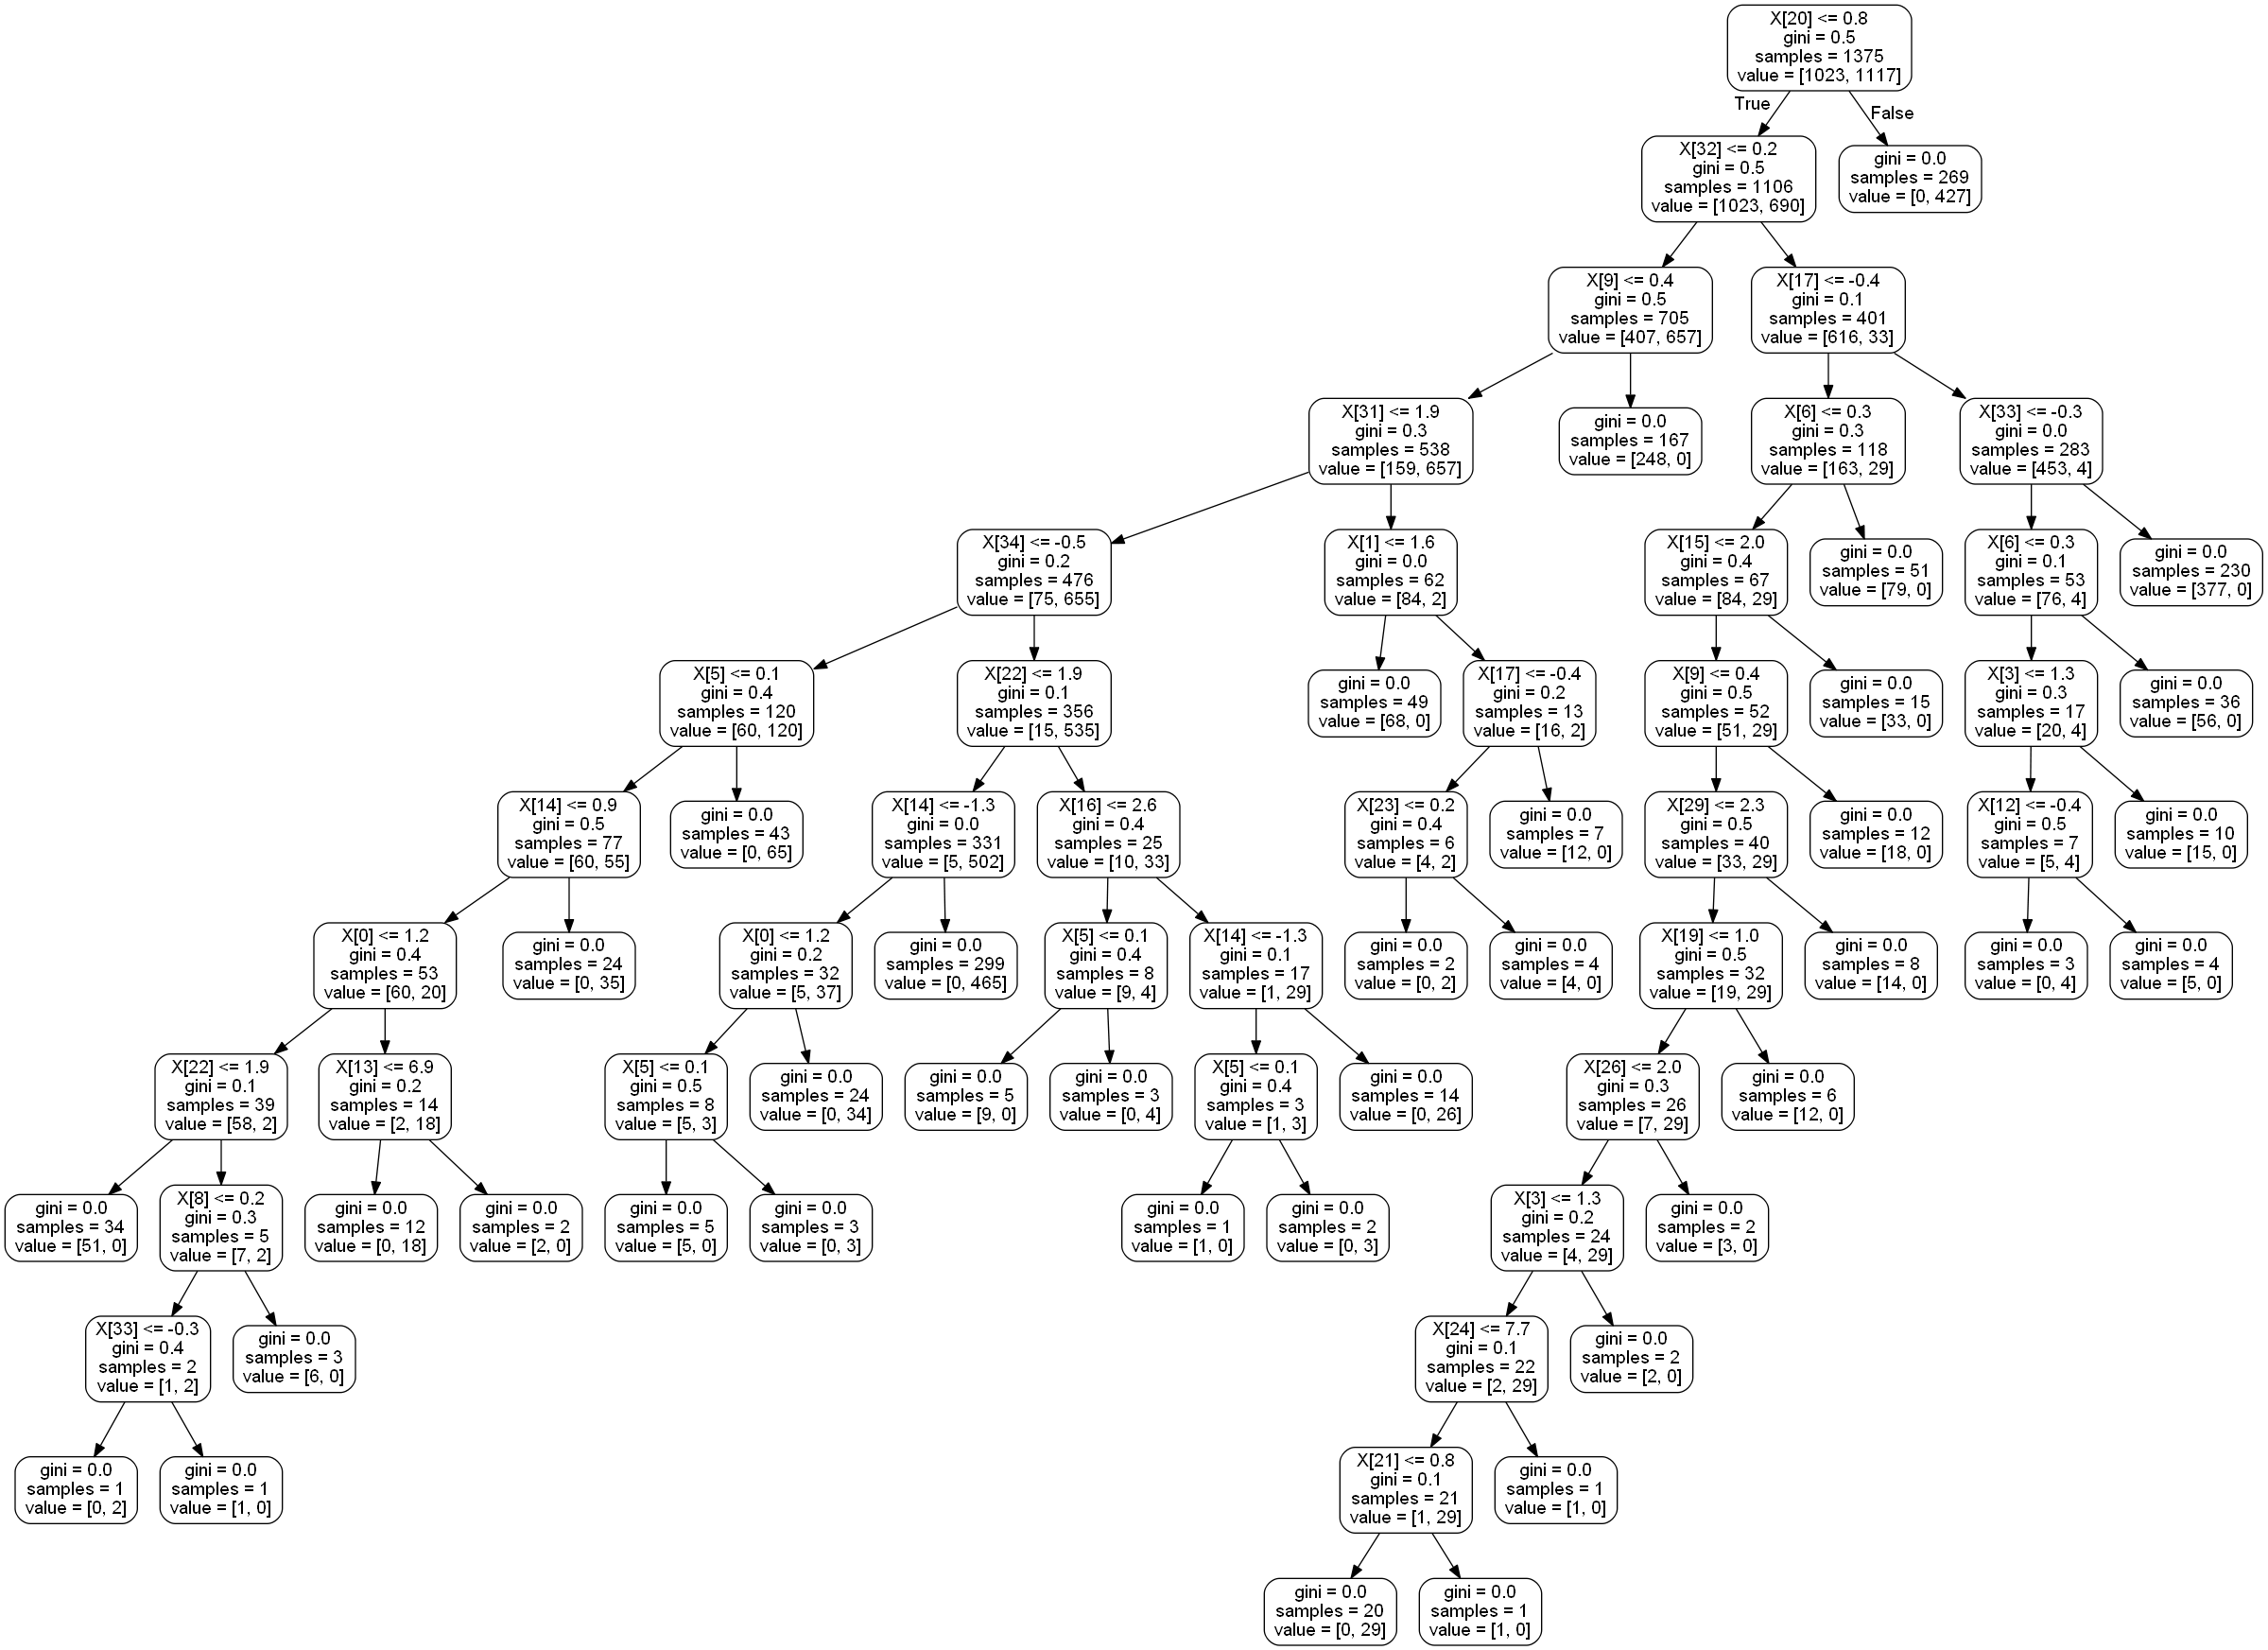

In [228]:
Image("tree_ho.png")

### Visualization of validation losses

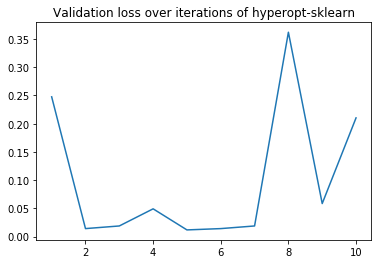

In [20]:
y = range(1, n_iter_search+1)
X = [i['loss'] for i in estim.trials.results]
plt.figure(1) 
plt.title("Validation loss over iterations of hyperopt-sklearn")
plt.plot(y, X, label="Loss")
plt.show()

## Random search of hyperparameters

In [32]:
clf = RandomForestClassifier(random_state=42)

# parameters range for random search
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 30), #number of features to consider when looking for the best split
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
               "n_estimators": randint(1, 3000)}

In [34]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)

In [27]:
# list to store scores over loop evaluations of benchmark
rs_scores = list()

In [ ]:
%%timeit -o -n 100
random_search.fit(X_train, y_train)

print("=====RESULTS======")
rs_score1 = random_search.score(X_test, y_test)
rs_scores.append(rs_score1)
print(rs_score1)
print(random_search.best_estimator_)

=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=2843,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9962085308056872
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2437,
                       n_jobs=None, oob_score=False, random_state=

                       warm_start=False)
=====RESULTS======
0.9876777251184834
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=2568,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.995260663507109
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=2328,
                       n_j

                       warm_start=False)
=====RESULTS======
0.995260663507109
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=664,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9943127962085309
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=28, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=353,
                       n_jobs=None, 

                       warm_start=False)
=====RESULTS======
0.9924170616113744
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1902,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=23, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1836,
                       n_jobs

                       warm_start=False)
=====RESULTS======
0.990521327014218
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1062,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9962085308056872
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=88,
                       n_jobs=Non

                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=2490,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9962085308056872
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=2844,
                       n

                       warm_start=False)
=====RESULTS======
0.9962085308056872
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=317,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9772511848341232
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=2950,
                       n_jo

                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=543,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9706161137440759
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1753,
                       n_jo

                       warm_start=False)
=====RESULTS======
0.9962085308056872
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=739,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=28, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=2450,
                       n_jobs=

                       warm_start=False)
=====RESULTS======
0.9933649289099526
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=476,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.985781990521327
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=316,
                       n_jobs=None

                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1257,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=2028,
                       n_

                       warm_start=False)
=====RESULTS======
0.9753554502369668
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1483,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=1180,
                       n_j

                       warm_start=False)
=====RESULTS======
0.995260663507109
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=2195,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
=====RESULTS======
0.9971563981042654
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1637,
                       n_

In [267]:
runtime_rs = _

In [272]:
rs_scores

[0.966824644549763, 0.9772511848341232, 0.9706161137440759, 0.9696682464454977]

### Visualization of a tree from Random Forest

In [235]:
tree = random_search.best_estimator_[0]
export_graphviz(tree, out_file = 'tree.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_rs.png')

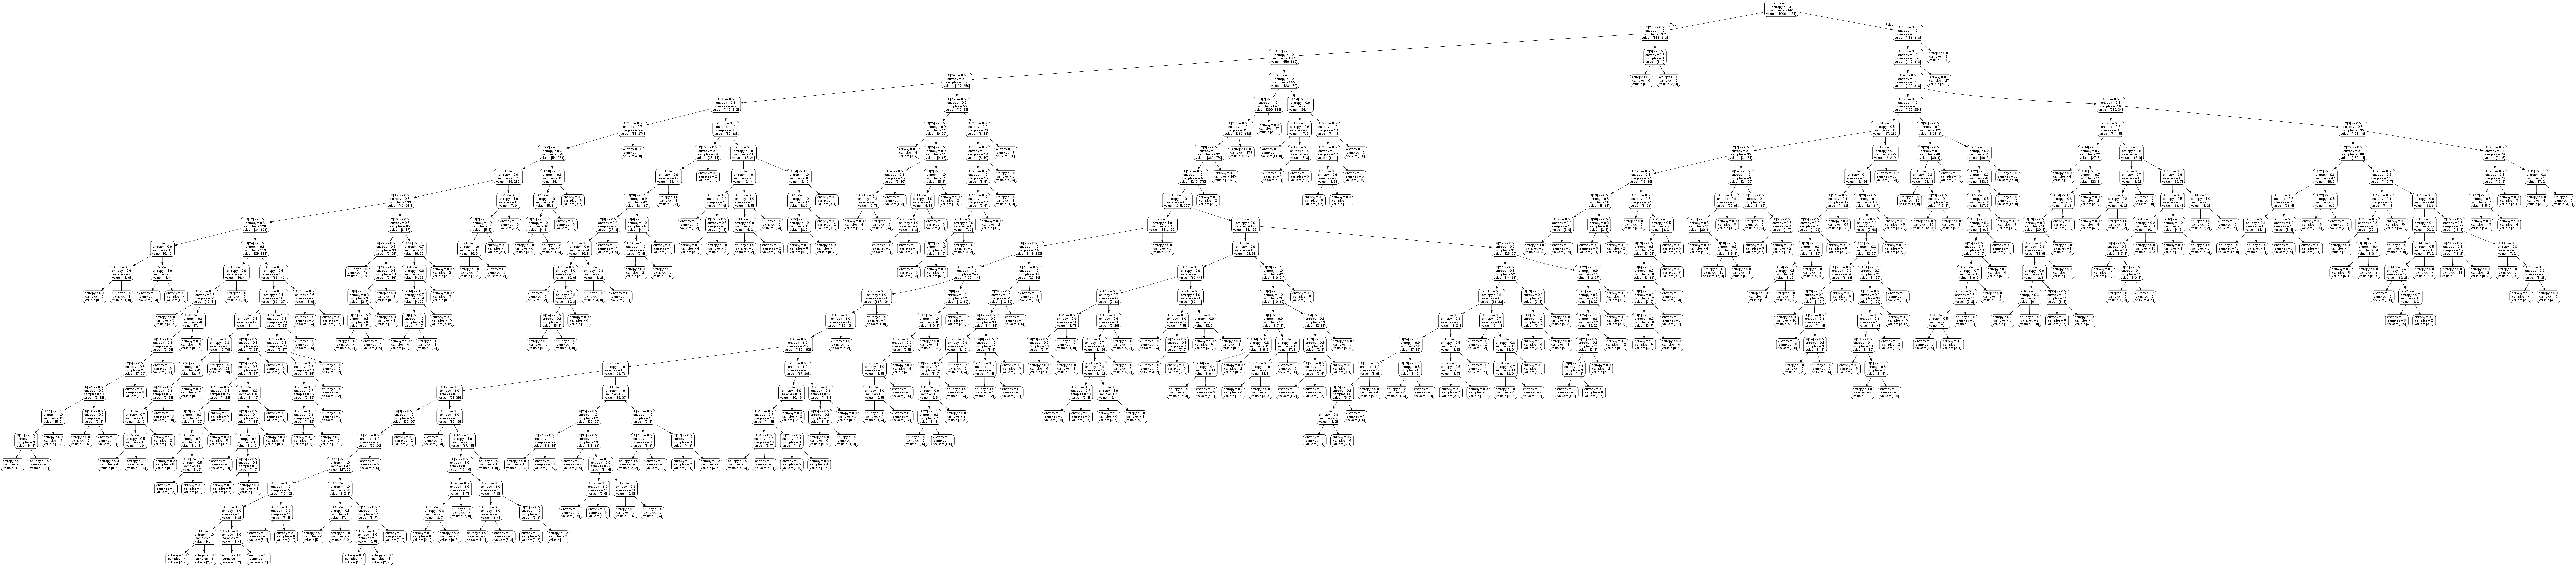

In [236]:
Image('tree_rs.png')

### Visualization of validation scores

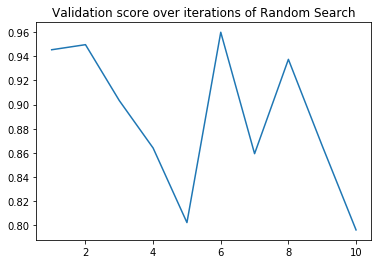

In [296]:
y = range(1, n_iter_search+1)
X = random_search.cv_results_[f'mean_test_score'][::-1]
plt.figure(2) 
plt.title("Validation score over iterations of Random Search")
# TODO add labels to plot
plt.plot(y, X)
plt.show()

### Comparison of runtime

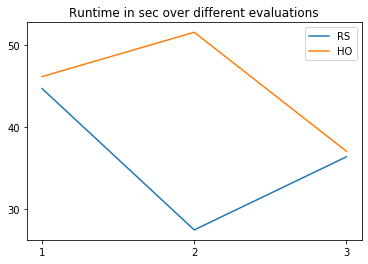

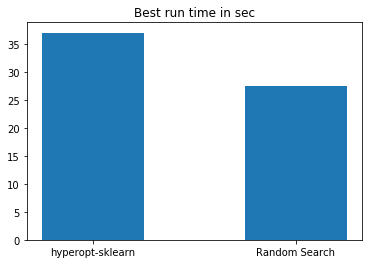

In [298]:
def plot_runtimes(runtime_ho, runtime_rs):

    plt.figure()
    plt.locator_params(nbins=len(runtime_ho.all_runs))
    plt.title("Runtime in sec over different evaluations")

    plt.(range(1, len(runtime_rs.all_runs)+1), runtime_rs.all_runs, label="RS")
    plt.plot(range(1, len(runtime_ho.all_runs)+1), runtime_ho.all_runs, label="HO")
    plt.legend()

    plt.figure()
    plt.title("Best run time in sec")
    plt.bar(["hyperopt-sklearn", "Random Search"],[runtime_ho.best, runtime_rs.best], width=0.5)
    plt.show()
    
plot_runtimes(runtime_ho, runtime_rs)

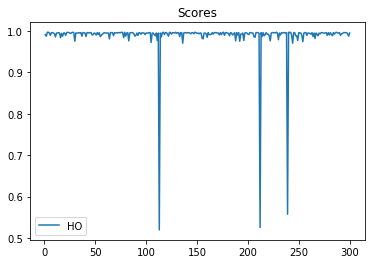

In [23]:
def plot_scores(ho_scores, rs_scores=None):
    plt.figure()
    #plt.locator_params(nbins=len(ho_scores))
    plt.title("Scores")
    plt.plot(range(1, len(ho_scores)+1), ho_scores, label="HO", c="b")
    #plt.plot(range(1, len(rs_scores)+1), rs_scores, label="RS", c="g")
    #xticks(ho_scores)
    plt.legend()
    plt.savefig('scores.png', format='png', dpi=600)
    plt.show()
plot_scores(ho_scores)

## Dataset 2

### Load dataset

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [300]:
data2 = pd.read_csv("adult.data", names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                                                "occupation", "relationship", "race", "sex",
                                                "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [301]:
data2 = data2.drop(['education-num'], axis=1)

In [302]:
data2.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [303]:
data2.shape

(32561, 14)

In [304]:
X2 = data2.loc[:, :'native-country']

In [305]:
y2 = data2.loc[:, 'income']

### Preprocessing of categorical columns

In [306]:
cat_cols = ["workclass", "education", "marital-status",
            "occupation", "relationship", "race", "sex",
             "native-country"]


le = LabelEncoder()
for col in cat_cols:
    X2[col] = le.fit_transform(X2[col])

ohe = OneHotEncoder(sparse=False, categorical_features=X2.columns.isin(cat_cols))
X2 = ohe.fit_transform(X2)


In [307]:
y2 = le.fit_transform(y2)
ohe = OneHotEncoder(sparse=False)
y2 = ohe.fit_transform(y2.reshape(-1, 1))

### Make train and test subsets

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [ ]:
X2_train = np.array(X2_train)
X2_test = np.array(X2_test)

## Appy HyperoptEstimator with Random forest 

In [ ]:
ho_scores2 = list()

In [ ]:
%%timeit -o

estim2.fit(X2_train, y2_train)
print("=====RESULTS======")
HO_score2 = estim2.score(X2_test, y2_test)
ho_scores2.append(HO_score2)
print(HO_score2)
print(estim2.best_model())

  0%|                                                                              | 0/1 [00:00<?, ?it/s, best loss: ?]
=====RESULTS======
0.8482225944537503
{'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.215753922847725,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=440, n_jobs=1, oob_score=False,
                       random_state=2, verbose=False, warm_start=False), 'preprocs': (Normalizer(copy=True, norm='l2'),), 'ex_preprocs': ()}
  0%|                                                                              | 0/1 [00:00<?, ?it/s, best loss: ?]

In [ ]:
runtime_ho2 = _

## Random Search of hyperparameters

In [ ]:
rs_scores2 = list()

In [ ]:
%%timeit -o
random_search.fit(X2_train, y2_train)
print("=====RESULTS======")
rs_score2 = random_search.score(X2_test, y2_test)
rs_scores2.append(rs_score2)
print(rs_score2)
print(random_search.best_estimator_)

In [ ]:
runtime_rs2 = _

In [ ]:
plot_runtimes(runtime_ho2, runtime_rs2)

In [ ]:
plot_scores(ho_scores2, rs_scores2)

## Gaussian process vusialization

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

In [ ]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gp = GaussianProcessRegressor(kernel=kernel)
# Prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1, c='g')
plt.xlim(0, 5)
plt.ylim(-3, 3)

# Generate data and fit GP
rng = np.random.RandomState(4)
X = rng.uniform(0, 5, 10)[:, np.newaxis]
y = np.sin((X[:, 0] - 2.5) ** 2)
gp.fit(X, y)

# Posterior
plt.subplot(2, 1, 2)
X_ = np.linspace(0, 5, 100)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)

y_samples = gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1, c='g')
plt.scatter(X[:, 0], y, c='grey', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.xlim(0, 5)
plt.ylim(-3, 3)
plt.tight_layout()
plt.savefig('gp.png', format='png', dpi=600)
plt.show()